In [122]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib.pyplot import cm


In [123]:
timing_fxa_reeds_prod = 32 * 5 / 1000 #us
timing_fxa_reeds_prep = (16 + (21 * 0.2) + 17 + (7 * 32 * 0.5) )/ 1000 #us

In [124]:
timing_gsk_reeds_prod = 32 * 10 / 1000 #us
timing_gsk_reeds_prep = (16 + (21 * 0.2) + 17 + (8 * 32 * 1))/ 1000 #us

In [125]:
# From Greg Ross paper:
# 24 lambdas for a charge change
# 12 lambdas for a basic calc
# lambdas all sampled for 20ns (here we can put same value as what I used)

In [126]:
# From JCTC paper:
# 24 lambdas for a charge change
# 12 lambdas for a basic calc
# 5 ns of sampling per lambda

In [127]:
# Assuming star shapped perturbation map + additional perturbation of charge towards uncharged for al 8
timing_fxa_jctc2019 = ((7 * 12 * 5) + (8 * 24 * 5)) / 1000

In [128]:
# Assuming star shapped perturbation map + additional perturbation of charge towards uncharged for al 8
timing_gsk_estimated = ((7 * 12 * 5) + (8 * 12 * 5)) / 1000

# Make the plot

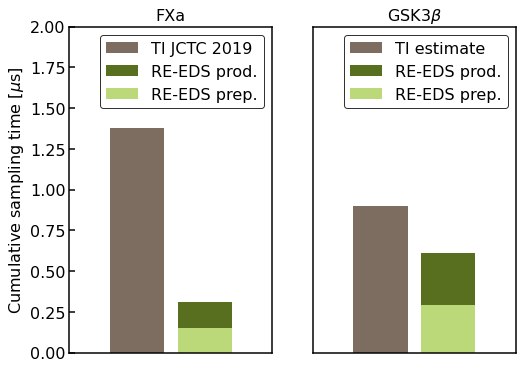

In [164]:
mosaic = """
    AB
    """

c_reeds = '#576F1F' # '#6D4022' # test: #576F1F
c_reeds_prop = '#BCD979' #'#D8A47F' # test: #BCD979

edgecolor = 'lightgrey'
linewidth = 0

width = 0.8

fig = plt.figure(figsize = [8, 6],)
ax_dict = fig.subplot_mosaic(mosaic)

fontsize = 16

ax= ax_dict['A']

ax.bar(0, timing_fxa_jctc2019, color = '#7D6D61', label = 'TI JCTC 2019', width = width, edgecolor=edgecolor, linewidth=linewidth)

ax.bar(1, timing_fxa_reeds_prep + timing_fxa_reeds_prod, color = c_reeds, label = 'RE-EDS prod.', width = width, edgecolor=edgecolor, linewidth=linewidth)
ax.bar(1, timing_fxa_reeds_prep, color = c_reeds_prop, label = 'RE-EDS prep.', width = width, edgecolor=edgecolor, linewidth=linewidth)

ax.set_title('FXa', fontsize=fontsize)

ax.set_ylabel(r'Cumulative sampling time [$\mu$s]', fontsize=fontsize)

#
#
#

ax= ax_dict['B']
ax.bar(0, timing_gsk_estimated, color = '#7D6D61', label = 'TI estimate', width = width, edgecolor=edgecolor, linewidth=linewidth )
ax.bar(1, timing_gsk_reeds_prep + timing_gsk_reeds_prod, color = c_reeds, label = 'RE-EDS prod.', width = width, edgecolor=edgecolor, linewidth=linewidth)
ax.bar(1, timing_gsk_reeds_prep, color = c_reeds_prop, label = 'RE-EDS prep.', width = width, edgecolor=edgecolor, linewidth=linewidth)

ax.set_title(r'GSK3$\beta$', fontsize=fontsize)

ax.get_yaxis().set_visible(False)


# Make some style changes:

for key in ['A', 'B']: 
    ax = ax_dict[key]
    
    ax.legend(fontsize=fontsize, fancybox=True, edgecolor='black')
    ax.set_xlim([-1, 2])
    
    ax.set_ylim([0, 2])
    ax.tick_params(axis="y",direction="in", length = 6, width = 1.5, labelsize=fontsize)
    ax.tick_params(axis="x",direction="in", length = 0, width = 1.5, labelsize=fontsize)
    
    ax.get_xaxis().set_visible(False)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

In [165]:
fig.savefig('/home/cchampion/Desktop/REEDS_protonation_sampling.png', dpi=150)